In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
folder_path = "/Users/rohinpalsule/Downloads/gwf"
folder_path_2 = "/Users/rohinpalsule/Downloads/gw_replica"

df_list = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading: {file}")
        try:
            df_individual = pd.read_csv(file_path, on_bad_lines='skip')
            if 'Peoria' in df_individual['cities'][0]:
                df_individual['city_type'] = 'US'
            else: df_individual['city_type'] = 'Fictional'
            df_list.append(df_individual)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate all DataFrames
df_flights = pd.concat(df_list, ignore_index=True)

df_rep_list = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path_2):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path_2, file)
        print(f"Reading: {file}")
        try:
            df_individual = pd.read_csv(file_path, on_bad_lines='skip')
            df_rep_list.append(df_individual)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate all DataFrames
df_rep = pd.concat(df_rep_list, ignore_index=True)


Reading: final_S_67cf70ec9741a100ffc7f570.csv
Reading: final_S_634ef87aec0966557c825573.csv
Reading: final_S_67dff4b10f363a1974679065.csv
Reading: final_S_67eec1cf02e625e0d469f1ed.csv
Reading: final_S_56e60e39f7957b000b18e37b.csv
Reading: final_S_66f02f508e8473f0362ed99e.csv
Reading: final_S_6732ca9052a3b5780ec6068a.csv
Reading: final_S_615e420a23219efe3427a367.csv
Reading: final_S_682b4aa9f44c4882f1629d8a.csv
Reading: final_S_67e1ab7aba45c5e515df8a71.csv
Reading: final_S_628f7e982aad1788d940317a.csv
Reading: final_S_5cba50bf114fa5001aac5570.csv
Reading: final_S_6657584ca6e3645f4a99e753.csv
Reading: final_S_6826aa7ffe3641d3eba2c4bd.csv
Reading: final_S_682dd11f39ce4e00502afaf7.csv
Reading: final_S_66ecded667f721bca7e5609d.csv
Reading: final_S_5fadeb340e10471fdeb5fbf5.csv
Reading: final_S_67351d691e6e9753f1834168.csv
Reading: final_S_57bb6878eb28030001f7ea94.csv
Reading: final_S_66e4c4358de330a06b4d33f1.csv
Reading: final_S_67414dcbcf89f6a633385d49.csv
Reading: final_S_67e2b86a96de1816d

In [2]:
# Adding partid from worker id

df_flights['partid'] = df_flights['responses'].str.replace('{worker_id:',"").str.replace('}', '')
df_flights['partid'] = df_flights['partid'].ffill()

df_rep['partid'] = df_rep['responses'].str.replace('{worker_id:',"").str.replace('}', '')
df_rep['partid'] = df_rep['partid'].ffill()


In [3]:
# Add ages
old_path = '/Users/rohinpalsule/Downloads/OAdemo.csv'
old2_path = '/Users/rohinpalsule/Downloads/demoOAbatch02.csv'
old_demographic = pd.read_csv(old_path, on_bad_lines='skip')
old2_demographic = pd.read_csv(old2_path,on_bad_lines='skip')

young_path = '/Users/rohinpalsule/Downloads/YAdemo.csv'
young2_path = '/Users/rohinpalsule/Downloads/demoYAbatch02.csv'
young_demographic = pd.read_csv(young_path, on_bad_lines='skip')
young2_demographic = pd.read_csv(young2_path,on_bad_lines='skip')

old_demographic = pd.concat([old_demographic,old2_demographic])
young_demographic = pd.concat([young_demographic,young2_demographic])

old_ids = old_demographic['Participant id']
young_ids = young_demographic['Participant id']

def get_ages(row):
    for old_id in old_ids:
        if old_id in row['partid']:
            return 'old'
    for young_id in young_ids:
        if young_id in row['partid']:
            return 'young'
        
df_flights['age'] = df_flights.apply(get_ages,axis=1)


df_rep['age'] = df_rep.apply(get_ages,axis=1)
# df_rep[(df_rep['age'] != 'young')& (df_rep['age'] != 'old')]
# df_flights[(df_flights['age'] != 'young')& (df_flights['age'] != 'old')]

In [4]:
old_demographic[old_demographic['Status'] == 'AWAITING REVIEW']['Age']

0     73
1     71
2     72
5     71
7     71
9     69
10    69
12    67
14    67
15    75
16    72
18    66
22    65
23    67
24    74
25    67
28    69
30    65
31    68
32    65
0     72
1     65
2     80
3     69
4     72
5     79
6     67
7     66
8     71
9     69
10    73
11    70
12    67
13    73
Name: Age, dtype: object

In [5]:
young_demographic[young_demographic['Status'] == 'AWAITING REVIEW']['Age'].max()

'39'

In [6]:
folderpath = "/Users/rohinpalsule/Downloads/textdem"
df_list = []
for file in os.listdir(folderpath):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folderpath, file)
        print(f"Reading: {file}")
        try:
            df_individual = pd.read_csv(file_path, on_bad_lines='skip')
            df_list.append(df_individual)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate all DataFrames
df_text = pd.concat(df_list, ignore_index=True)
# First, convert 'Age' column to numeric with error handling
df_text['Age'] = pd.to_numeric(df_text['Age'], errors='coerce')

# Then filter and compute max
df_text[(df_text['Status'] == 'APPROVED') & (df_text['Age'] >= 60)]['Age'].agg(['mean','std','min','max','count'])
df_text[(df_text['Status'] == 'APPROVED') & (df_text['Age'] < 60)]['Sex'].value_counts()

Reading: prolific_export_6816bde66fbfad310eb3bb21.csv
Reading: prolific_export_68015cae244313e117508b1d.csv
Reading: prolific_export_6802f8fc96db74f06241f6f5.csv
Reading: prolific_export_68042d7d68701cd97c597d06 (1).csv
Reading: prolific_export_6813e3e4ae9a266b0392a254 (1).csv


Sex
Male      12
Female    11
Name: count, dtype: int64

In [7]:
folderpath = "/Users/rohinpalsule/Downloads/imagedem"
df_list = []
for file in os.listdir(folderpath):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folderpath, file)
        print(f"Reading: {file}")
        try:
            df_individual = pd.read_csv(file_path, on_bad_lines='skip')
            df_list.append(df_individual)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate all DataFrames
df_text = pd.concat(df_list, ignore_index=True)
# First, convert 'Age' column to numeric with error handling
df_text['Age'] = pd.to_numeric(df_text['Age'], errors='coerce')

# Then filter and compute max
df_text[(df_text['Status'] == 'APPROVED') & (df_text['Age'] >= 60)]['Sex'].value_counts()

Reading: prolific_export_68168dd94eac0030ad713e74.csv
Reading: prolific_export_6812cca63aec2cb8fee09ab0 (2).csv
Reading: prolific_export_68167f21e57d0871b954c92b (1).csv
Reading: prolific_export_6817d0669046443019cf1929.csv


Sex
Female    16
Male       9
Name: count, dtype: int64

In [8]:
replication_iden = df_rep[~df_rep['graphorder'].isna()]
replication_iden = replication_iden[['partid','graphorder']]

flights_iden = df_flights[~df_flights['cities'].isna()]
flights_iden = flights_iden[['partid','cities','city_images']]
flights_iden = flights_iden.rename(columns={"cities":"graphorder"})

flights_iden.to_csv("flights_graph_identifier.csv",index=False)
replication_iden.to_csv("replication_graph_identifier.csv",index=False)

3924


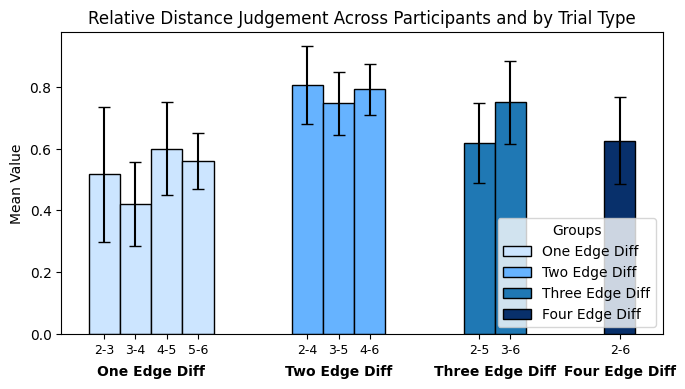

In [9]:
# bad_partid = ['5cba50bf114fa5001aac5570','6657584ca6e3645f4a99e753','67e2b86a96de1816df85cefe','5fadeb340e10471fdeb5fbf5']
direct_df = df_rep[df_rep['trial_type']=='directmemory_phase']
direct_df = direct_df.loc[:, ~direct_df.isna().all()]
direct_df = direct_df.drop(columns=['time_elapsed','cumulative_accuracy','weighted_accuracy','missedtrial']).reset_index(drop='index')
direct_df = direct_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
direct_df = direct_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
direct_df = direct_df.map(lambda x: x.replace('../static/images/GW/', '') if isinstance(x, str) else x)


direct_df.to_csv("replication_direct_df.csv",index=False)
shortest_df = df_rep[df_rep['trial_type']=='shortestpath_phase']
shortest_df = shortest_df.loc[:, ~shortest_df.isna().all()]
shortest_df = shortest_df.drop(columns=['time_elapsed','cumulative_accuracy']).reset_index(drop='index')
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/GW/', '') if isinstance(x, str) else x)
shortest_df.to_csv("replication_shortest_df.csv",index=False)
# Step 1: Combine stimulus and stimulus_correct into one long-form df with accuracy
long_direct_df = pd.concat([
    direct_df[['partid', 'stimulus', 'accuracy']].rename(columns={'stimulus': 'city'}),
    direct_df[['partid', 'stimulus_correct', 'accuracy']].rename(columns={'stimulus_correct': 'city'})
])

# Step 2: Group by participant and city, then check if all accuracies were 1.0
city_accuracy = long_direct_df.groupby(['partid', 'city'])['accuracy'].agg(lambda x: (x == 1.0).all()).reset_index()
city_accuracy = city_accuracy[city_accuracy['accuracy']]  # Keep only 100% accurate cities
city_accuracy = city_accuracy.drop(columns='accuracy')     # Just keep partid and city

# Step 3: Filter shortest_df by keeping only rows where both cities were 100% accurate
filtered_shortest_df = shortest_df[
    shortest_df.apply(
        lambda row: (
            (row['partid'], row['stimulus']) in city_accuracy.set_index(['partid', 'city']).index and
            (row['partid'], row['stimulus_correct']) in city_accuracy.set_index(['partid', 'city']).index
        ),
        axis=1
    )
]
print(filtered_shortest_df.size)
grouped_shortest = filtered_shortest_df.groupby(['partid','specific_pairs'])['accuracy'].agg(['mean','count']).reset_index()

twothree = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Three Edge']
threefour = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Four Edge']
fourfive = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Five Edge']
fivesix = grouped_shortest[grouped_shortest['specific_pairs']=='Five Edge Six Edge']

twofour = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Four Edge']
threefive = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Five Edge']
foursix = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Six Edge']

twofive = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Five Edge']
threesix = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Six Edge']

twosix = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Six Edge']

# --- Sample Data ---
group_labels = ['One Edge Diff', 'Two Edge Diff', 'Three Edge Diff', 'Four Edge Diff']

# Generate dummy data
heights = [
    [twothree['mean'].mean(), threefour['mean'].mean(), fourfive['mean'].mean(), fivesix['mean'].mean()],  # One diff
    [twofour['mean'].mean(), threefive['mean'].mean(), foursix['mean'].mean()],       # Two diff
    [twofive['mean'].mean(), threesix['mean'].mean()],            # Three diff
    [twosix['mean'].mean()]                  # Four diff
]

errors = [
    [twothree['mean'].sem(), threefour['mean'].sem(), fourfive['mean'].sem(), fivesix['mean'].sem()],  # One diff
    [twofour['mean'].sem(), threefive['mean'].sem(), foursix['mean'].sem()],       # Two diff
    [twofive['mean'].sem(), threesix['mean'].sem()],            # Three diff
    [twosix['mean'].sem()]                  # Four diff
]

bar_labels = [
    ['2-3', '3-4', '4-5', '5-6'],     # One diff
    ['2-4', '3-5', '4-6'],          # Two diff
    ['2-5', '3-6'],               # Three diff
    ['2-6']                    # Four diff
]

bar_width = 0.2
group_gap = 0.5

fig, ax = plt.subplots(figsize=(7, 4))

x_offset = 0
all_positions = []
all_labels = []
group_centers = []
# Optional: participant-level means
participant_means = shortest_df.groupby(['partid', 'specific_pairs'])['accuracy'].mean().reset_index()

# Then Tukey test on those
# tukey = pairwise_tukeyhsd(endog=participant_means['accuracy'],
#                         groups=participant_means['specific_pairs'],
#                         alpha=0.05)
# print(tukey.summary())
# Define blue color shades (lightest to darkest)
# group_colors = ['#e0d7f5', '#b39ddb', '#9575cd', '#512da8']
group_colors = ['#cce5ff', '#66b3ff', '#1f78b4', '#08306b']  # Adjust or expand as needed

for i, (group, group_err, labels) in enumerate(zip(heights, errors, bar_labels)):
    num_bars = len(group)
    positions = np.arange(num_bars) * bar_width + x_offset
    ax.bar(positions, group, yerr=group_err, capsize=4, width=bar_width,
        edgecolor='black', label=group_labels[i], color=group_colors[i])
    
    # Store positions and labels for x-ticks
    all_positions.extend(positions)
    all_labels.extend(labels)
    
    # Calculate center of group for big group label
    group_centers.append(positions.mean())
    
    # Update x offset for next group
    x_offset = positions[-1] + bar_width + group_gap

# Set small bar labels as x-tick labels
ax.set_xticks(all_positions)
ax.set_xticklabels(all_labels, fontsize=9)

# Add big group labels below
for center, label in zip(group_centers, group_labels):
    ax.text(center, -0.1, label, ha='center', va='top', fontsize=10,
            fontweight='bold', transform=ax.transData)
# --- Formatting ---
ax.legend(title='Groups')
ax.set_ylabel('Mean Value')
ax.set_title(f'Relative Distance Judgement Across Participants and by Trial Type')
plt.tight_layout()
plt.show()

In [10]:
node_rep_df =pd.read_csv("replicationdata_nodelabeled.csv",on_bad_lines='skip')
node_flights_df =pd.read_csv("flightdata_nodelabeled.csv",on_bad_lines='skip')
node_flights_df = node_flights_df[node_flights_df['trial_type']=='shortestpath_phase'].drop(
    columns=['stimulus_down_left','stimulus_down_mid','stimulus_down_right','stimulus_short','stimulus_far','city_type','key_press']).reset_index(
        drop='index')
node_rep_short_df = node_rep_df[node_rep_df['trial_type']=='shortestpath_phase'].drop(
    columns=['stimulus_down_left','stimulus_down_mid','stimulus_down_right','stimulus_short','stimulus_far','key_press']).reset_index(
        drop='index')

In [11]:
node_rep_short_df[node_rep_short_df['stimulus'].isna()]

,rt,trial_type,stimulus,accuracy,stimulus_correct,partid,age,stimulus_left,stimulus_right,condition,specific_pairs
120,2326.6,shortestpath_phase,NaN,1.0,NaN,67dcc12657e2fe1375df7f89,young,NaN,NaN,Two Edge Diff,Three Edge Five Edge
239,NaN,shortestpath_phase,NaN,0.0,NaN,67ce1feb43ee9200186c94b3,old,NaN,NaN,One Edge Diff,Four Edge Five Edge
240,2646.7,shortestpath_phase,NaN,1.0,NaN,67ce1feb43ee9200186c94b3,old,NaN,NaN,Three Edge Diff,Three Edge Six Edge
241,1560.2,shortestpath_phase,NaN,1.0,NaN,67ce1feb43ee9200186c94b3,old,NaN,NaN,One Edge Diff,Three Edge Four Edge
603,NaN,shortestpath_phase,NaN,0.0,NaN,6526f601bedbae17738408b1,old,NaN,NaN,Two Edge Diff,Two Edge Four Edge
604,NaN,shortestpath_phase,NaN,0.0,NaN,6526f601bedbae17738408b1,old,NaN,NaN,One Edge Diff,Five Edge Six Edge
846,1868.3,shortestpath_phase,NaN,1.0,NaN,668c85c9f955972065292902,young,NaN,NaN,One Edge Diff,Two Edge Three Edge
1209,2109.8,shortestpath_phase,NaN,1.0,NaN,66660a053b08e2a34f9b945c,young,NaN,NaN,Three Edge Diff,Two Edge Five Edge
1572,2494.4,shortestpath_phase,NaN,1.0,NaN,67db09c719a34f37f3f38e0a,old,NaN,NaN,One Edge Diff,Five Edge Six Edge
1814,2240.8,shortestpath_phase,NaN,1.0,NaN,65631b21aff167a83105c476,old,NaN,NaN,Three Edge Diff,Three Edge Six Edge


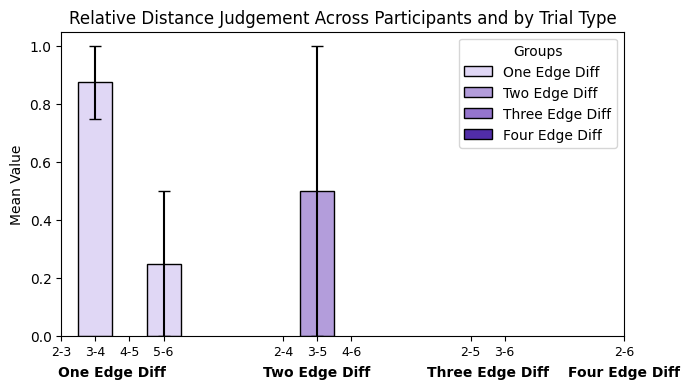

In [12]:
bad_partid = ['5cba50bf114fa5001aac5570','6657584ca6e3645f4a99e753','67e2b86a96de1816df85cefe','5fadeb340e10471fdeb5fbf5']
direct_df = df_flights[df_flights['trial_type']=='directmemory_phase']
direct_df = direct_df.loc[:, ~direct_df.isna().all()]
direct_df = direct_df.drop(columns=['time_elapsed','cumulative_accuracy','weighted_accuracy','missedtrial']).reset_index(drop='index')
direct_df = direct_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
direct_df = direct_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
direct_df = direct_df.map(lambda x: x.replace('../static/images/GW/', '') if isinstance(x, str) else x)
direct_df.to_csv("flights_direct_df.csv",index=False)
shortest_df = df_flights[df_flights['trial_type']=='shortestpath_phase']
shortest_df = shortest_df.loc[:, ~shortest_df.isna().all()]
shortest_df = shortest_df.drop(columns=['time_elapsed','cumulative_accuracy']).reset_index(drop='index')
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/GW/', '') if isinstance(x, str) else x)
shortest_df.to_csv("flights_shortest_df.csv",index=False)
# Step 1: Combine stimulus and stimulus_correct into one long-form df with accuracy
long_direct_df = pd.concat([
    direct_df[['partid', 'stimulus', 'accuracy']].rename(columns={'stimulus': 'city'}),
    direct_df[['partid', 'stimulus_correct', 'accuracy']].rename(columns={'stimulus_correct': 'city'})
])

# Step 2: Group by participant and city, then check if all accuracies were 1.0
city_accuracy = long_direct_df.groupby(['partid', 'city'])['accuracy'].agg(lambda x: (x == 1.0).all()).reset_index()
city_accuracy = city_accuracy[city_accuracy['accuracy']]  # Keep only 100% accurate cities
city_accuracy = city_accuracy.drop(columns='accuracy')     # Just keep partid and city

# Step 3: Filter shortest_df by keeping only rows where both cities were 100% accurate
filtered_shortest_df = shortest_df[
    shortest_df.apply(
        lambda row: (
            (row['partid'], row['stimulus']) in city_accuracy.set_index(['partid', 'city']).index and
            (row['partid'], row['stimulus_correct']) in city_accuracy.set_index(['partid', 'city']).index
        ),
        axis=1
    )
]
grouped_shortest = filtered_shortest_df.groupby(['partid','specific_pairs'])['accuracy'].agg(['mean','count']).reset_index()

twothree = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Three Edge']
threefour = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Four Edge']
fourfive = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Five Edge']
fivesix = grouped_shortest[grouped_shortest['specific_pairs']=='Five Edge Six Edge']

twofour = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Four Edge']
threefive = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Five Edge']
foursix = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Six Edge']

twofive = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Five Edge']
threesix = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Six Edge']

twosix = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Six Edge']

# --- Sample Data ---
group_labels = ['One Edge Diff', 'Two Edge Diff', 'Three Edge Diff', 'Four Edge Diff']

# Generate dummy data
heights = [
    [twothree['mean'].mean(), threefour['mean'].mean(), fourfive['mean'].mean(), fivesix['mean'].mean()],  # One diff
    [twofour['mean'].mean(), threefive['mean'].mean(), foursix['mean'].mean()],       # Two diff
    [twofive['mean'].mean(), threesix['mean'].mean()],            # Three diff
    [twosix['mean'].mean()]                  # Four diff
]

errors = [
    [twothree['mean'].sem(), threefour['mean'].sem(), fourfive['mean'].sem(), fivesix['mean'].sem()],  # One diff
    [twofour['mean'].sem(), threefive['mean'].sem(), foursix['mean'].sem()],       # Two diff
    [twofive['mean'].sem(), threesix['mean'].sem()],            # Three diff
    [twosix['mean'].sem()]                  # Four diff
]

bar_labels = [
    ['2-3', '3-4', '4-5', '5-6'],     # One diff
    ['2-4', '3-5', '4-6'],          # Two diff
    ['2-5', '3-6'],               # Three diff
    ['2-6']                    # Four diff
]

bar_width = 0.2
group_gap = 0.5

fig, ax = plt.subplots(figsize=(7, 4))

x_offset = 0
all_positions = []
all_labels = []
group_centers = []
# Optional: participant-level means
participant_means = shortest_df.groupby(['partid', 'specific_pairs'])['accuracy'].mean().reset_index()

# Then Tukey test on those
# tukey = pairwise_tukeyhsd(endog=participant_means['accuracy'],
#                         groups=participant_means['specific_pairs'],
#                         alpha=0.05)
# print(tukey.summary())
# Define blue color shades (lightest to darkest)
group_colors = ['#e0d7f5', '#b39ddb', '#9575cd', '#512da8']
# group_colors = ['#cce5ff', '#66b3ff', '#1f78b4', '#08306b']  # Adjust or expand as needed

for i, (group, group_err, labels) in enumerate(zip(heights, errors, bar_labels)):
    num_bars = len(group)
    positions = np.arange(num_bars) * bar_width + x_offset
    ax.bar(positions, group, yerr=group_err, capsize=4, width=bar_width,
        edgecolor='black', label=group_labels[i], color=group_colors[i])
    
    # Store positions and labels for x-ticks
    all_positions.extend(positions)
    all_labels.extend(labels)
    
    # Calculate center of group for big group label
    group_centers.append(positions.mean())
    
    # Update x offset for next group
    x_offset = positions[-1] + bar_width + group_gap

# Set small bar labels as x-tick labels
ax.set_xticks(all_positions)
ax.set_xticklabels(all_labels, fontsize=9)

# Add big group labels below
for center, label in zip(group_centers, group_labels):
    ax.text(center, -0.1, label, ha='center', va='top', fontsize=10,
            fontweight='bold', transform=ax.transData)
# --- Formatting ---
ax.legend(title='Groups')
ax.set_ylabel('Mean Value')
ax.set_title(f'Relative Distance Judgement Across Participants and by Trial Type')
plt.tight_layout()
plt.show()

In [13]:
shortest_df.shape

(2783, 13)

In [14]:
direct_old = direct_df[direct_df['age'] == 'old'].groupby('partid')['accuracy'].mean()
direct_young = direct_df[direct_df['age'] == 'young'].groupby('partid')['accuracy'].mean()

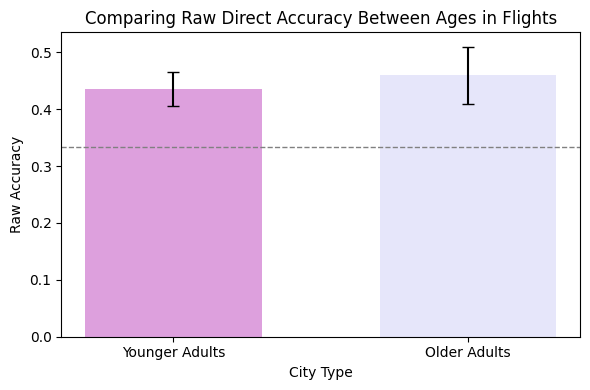

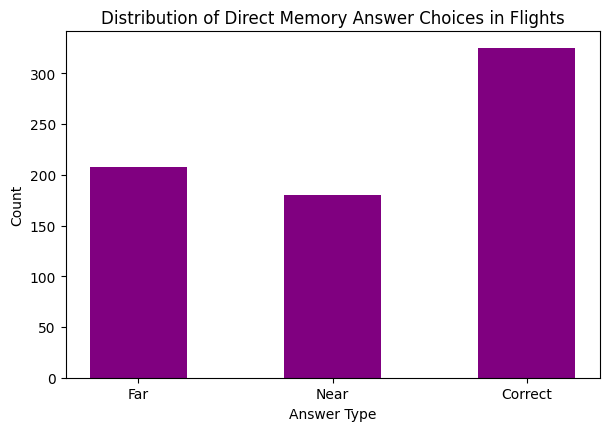

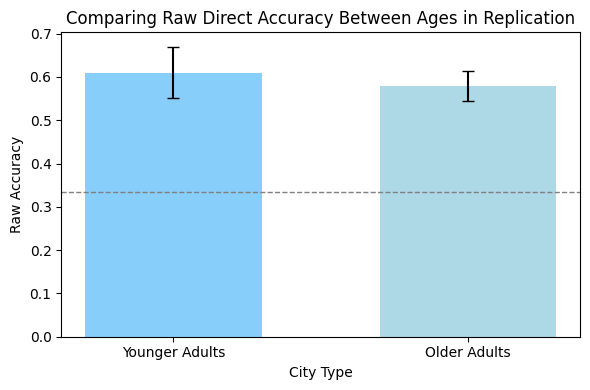

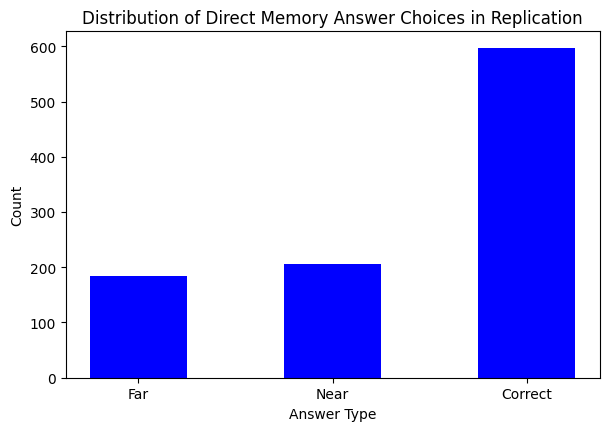

In [15]:
# Direct Memory df

def get_chosen_city(row):
    if  row['key_press'] == 49:
        return row['stimulus_down_left']
    elif  row['key_press'] == 50:
        return row['stimulus_down_mid']
    elif  row['key_press'] == 51:
        return row['stimulus_down_right']
    else: return pd.NA

def get_wrong_distance(row):
    if pd.isna(row['stimulus_selected']):
        return pd.NA
    elif row['stimulus_selected'] == row['stimulus_short']:
        return 'close'
    elif row['stimulus_selected'] == row['stimulus_far']:
        return 'far'
    elif row['stimulus_selected'] == row['stimulus_correct']:
        return 'correct'
    else: return pd.NA

def get_weighted_correct(row):
    if pd.isna(row['wrong_distance']):
        return pd.NA
    elif row['wrong_distance'] == 'close':
        return 0.5
    elif row['wrong_distance'] == 'far':
        return 0
    elif row['wrong_distance'] == 'correct':
        return 1
    else: return pd.NA

def get_direct_plots(df,exp_type):
    direct_df = df[df['trial_type']=='directmemory_phase']
    direct_df = direct_df.loc[:, ~direct_df.isna().all()]
    direct_df = direct_df.drop(columns=['time_elapsed','cumulative_accuracy','weighted_accuracy','missedtrial']).reset_index(drop='index')
    direct_df = direct_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
    direct_df = direct_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
    direct_df = direct_df.map(lambda x: x.replace('../static/images/GW/', '') if isinstance(x, str) else x)
    direct_df = direct_df[~direct_df['stimulus'].isna()]
    # for id in bad_partid:
    #     direct_df = direct_df[direct_df['partid'] != id]

    direct_df['stimulus_selected'] = direct_df.apply(get_chosen_city,axis=1)
    direct_df['wrong_distance'] = direct_df.apply(get_wrong_distance,axis=1)
    direct_df['weighted_correct'] = direct_df.apply(get_weighted_correct,axis=1)


    direct_old = direct_df[direct_df['age'] == 'old'].groupby('partid')['accuracy'].mean()
    direct_young = direct_df[direct_df['age'] == 'young'].groupby('partid')['accuracy'].mean()
    if exp_type == 'Flights':
        color = ['plum','lavender','purple']
    elif exp_type == 'Replication':
        color = ['lightskyblue','lightblue','blue']

    # Bar chart of prob
    plt.figure(figsize=(6,4))
    plt.bar(x=0.25,height= direct_young.mean(),yerr=direct_young.sem(),capsize=4,color=color[0],width=0.3,label='Younger Adults')
    plt.bar(x=0.75,height=direct_old.mean(),yerr=direct_old.sem(),capsize=4,color=color[1],width=0.3,label='Older Adults')
    plt.axhline(y=0.3333, color='gray', linestyle='--', linewidth=1)
    plt.xticks([0.25,0.75],['Younger Adults','Older Adults'])
    plt.xlabel("City Type")
    plt.ylabel("Raw Accuracy")
    plt.title(f"Comparing Raw Direct Accuracy Between Ages in {exp_type}")
    plt.tight_layout()
    plt.show()

    # Histogram of weighted prob
    plt.figure(figsize=(6,4))
    plt.hist(direct_df[~direct_df['weighted_correct'].isna()]['weighted_correct'],5,color=color[2])
    plt.tight_layout()
    plt.title(f"Distribution of Direct Memory Answer Choices in {exp_type}")
    plt.xticks([0.1,0.5,0.9],['Far',"Near","Correct"])
    plt.ylabel("Count")
    plt.xlabel("Answer Type")
    plt.show()
get_direct_plots(df_flights,'Flights')
get_direct_plots(df_rep,'Replication')

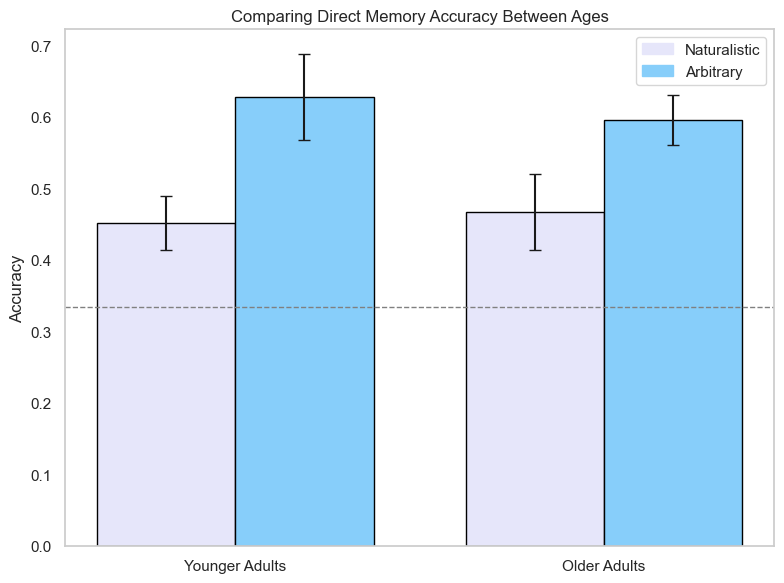

Younger Adults t-test (Flights vs Replication):
t = -2.488, p = 0.021

Older Adults t-test (Flights vs Replication):
t = -2.031, p = 0.057

T-tests vs Chance (0.333):
Younger - Flights: t = 3.163, p = 9.024e-03, mean = 0.451
Younger - Replication: t = 4.888, p = 2.398e-04, mean = 0.627
Older - Flights: t = 2.520, p = 3.037e-02, mean = 0.466
Older - Replication: t = 7.501, p = 1.265e-06, mean = 0.595


In [31]:
from matplotlib.patches import Patch
def get_stacked_direct_plots(df1,df2,exp_type1,exp_type2):
    df1 = df1[~df1['stimulus'].isna()]
    df2 = df2[~df2['stimulus'].isna()]
    direct_df1 = df1[df1['trial_type']=='directmemory_phase']
    direct_df1 = direct_df1.loc[:, ~direct_df1.isna().all()]
    direct_df1 = direct_df1.drop(columns=['time_elapsed','cumulative_accuracy','weighted_accuracy','missedtrial']).reset_index(drop='index')
    direct_df1 = direct_df1.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
    direct_df1 = direct_df1.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
    direct_df1 = direct_df1.map(lambda x: x.replace('../static/images/GW/', '') if isinstance(x, str) else x)

    # for id in bad_partid:
    #     direct_df = direct_df[direct_df['partid'] != id]

    direct_df1['stimulus_selected'] = direct_df1.apply(get_chosen_city,axis=1)
    direct_df1['wrong_distance'] = direct_df1.apply(get_wrong_distance,axis=1)
    direct_df1['weighted_correct'] = direct_df1.apply(get_weighted_correct,axis=1)
    direct_df1 = direct_df1[(direct_df1['rt']>400)&(direct_df1['rt']<5000)]

    direct_old1 = direct_df1[direct_df1['age'] == 'old'].groupby('partid')['accuracy'].mean()
    direct_young1 = direct_df1[direct_df1['age'] == 'young'].groupby('partid')['accuracy'].mean()
    if exp_type1 == 'Flights':
        color1 = ['lavender','lavender','purple']
    elif exp_type1 == 'Replication':
        color1 = ['lightskyblue','lightblue','blue']

    direct_df2 = df2[df2['trial_type']=='directmemory_phase']
    direct_df2 = direct_df2.loc[:, ~direct_df2.isna().all()]
    direct_df2 = direct_df2.drop(columns=['time_elapsed','cumulative_accuracy','weighted_accuracy','missedtrial']).reset_index(drop='index')
    direct_df2 = direct_df2.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
    direct_df2 = direct_df2.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
    direct_df2 = direct_df2.map(lambda x: x.replace('../static/images/GW/', '') if isinstance(x, str) else x)
    direct_df2 = direct_df2[(direct_df2['rt']>400)&(direct_df2['rt']<5000)]

    # for id in bad_partid:
    #     direct_df = direct_df[direct_df['partid'] != id]

    direct_df2['stimulus_selected'] = direct_df2.apply(get_chosen_city,axis=1)
    direct_df2['wrong_distance'] = direct_df2.apply(get_wrong_distance,axis=1)
    direct_df2['weighted_correct'] = direct_df2.apply(get_weighted_correct,axis=1)


    direct_old2 = direct_df2[direct_df2['age'] == 'old'].groupby('partid')['accuracy'].mean()
    direct_young2 = direct_df2[direct_df2['age'] == 'young'].groupby('partid')['accuracy'].mean()
    if exp_type2 == 'Flights':
        color2 = ['lavender','lavender','purple']
    elif exp_type2 == 'Replication':
        color2 = ['lightskyblue','lightblue','blue']
    # Bar chart of prob

    plt.figure(figsize=(8,6))
    plt.bar(x=0.2,height= direct_young1.mean(),yerr=direct_young1.sem(),capsize=4,color=color1[0],width=0.3,edgecolor='black',label='Naturalistic Framed')
    plt.bar(x=1,height=direct_old1.mean(),yerr=direct_old1.sem(),capsize=4,color=color1[0],width=0.3,edgecolor='black',label='Naturalistic Framed')
    plt.bar(x=0.5,height= direct_young2.mean(),yerr=direct_young2.sem(),capsize=4,color=color2[0],width=0.3,edgecolor='black',label='Abstract')
    plt.bar(x=1.3,height=direct_old2.mean(),yerr=direct_old2.sem(),capsize=4,color=color2[0],width=0.3,edgecolor='black',label='Abstract')
    plt.axhline(y=0.3333, color='gray', linestyle='--', linewidth=1)
    plt.xticks([0.35,1.15],['Younger Adults','Older Adults'])
    plt.ylabel( "Accuracy")
    plt.title(f"Comparing Direct Memory Accuracy Between Ages")
    handles = [Patch(color=color1[0], label='Naturalistic'), Patch(color=color2[0], label='Arbitrary')]
    plt.legend(handles=handles)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    from scipy.stats import ttest_ind

    # Younger adults: Flights vs Replication
    t_young = ttest_ind(direct_young1, direct_young2, equal_var=False)
    print("Younger Adults t-test (Flights vs Replication):")
    print(f"t = {t_young.statistic:.3f}, p = {t_young.pvalue:.3f}")

    # Older adults: Flights vs Replication
    t_old = ttest_ind(direct_old1, direct_old2, equal_var=False)
    print("\nOlder Adults t-test (Flights vs Replication):")
    print(f"t = {t_old.statistic:.3f}, p = {t_old.pvalue:.3f}")

    from scipy.stats import ttest_1samp

    # Chance level
    chance_level = 0.3333333

    print("\nT-tests vs Chance (0.333):")
    # Younger Adults
    if len(direct_young1) > 1:
        t_young1 = ttest_1samp(direct_young1, popmean=chance_level)
        print(f"Younger - Flights: t = {t_young1.statistic:.3f}, p = {t_young1.pvalue:.3e}, mean = {direct_young1.mean():.3f}")
    else:
        print("Younger - Flights: Not enough data for t-test")

    if len(direct_young2) > 1:
        t_young2 = ttest_1samp(direct_young2, popmean=chance_level)
        print(f"Younger - Replication: t = {t_young2.statistic:.3f}, p = {t_young2.pvalue:.3e}, mean = {direct_young2.mean():.3f}")
    else:
        print("Younger - Replication: Not enough data for t-test")

    # Older Adults
    if len(direct_old1) > 1:
        t_old1 = ttest_1samp(direct_old1, popmean=chance_level)
        print(f"Older - Flights: t = {t_old1.statistic:.3f}, p = {t_old1.pvalue:.3e}, mean = {direct_old1.mean():.3f}")
    else:
        print("Older - Flights: Not enough data for t-test")

    if len(direct_old2) > 1:
        t_old2 = ttest_1samp(direct_old2, popmean=chance_level)
        print(f"Older - Replication: t = {t_old2.statistic:.3f}, p = {t_old2.pvalue:.3e}, mean = {direct_old2.mean():.3f}")
    else:
        print("Older - Replication: Not enough data for t-test")
get_stacked_direct_plots(df_flights,df_rep,"Flights","Replication")

In [17]:
shortest_df = df_flights[df_flights['trial_type']=='shortestpath_phase']
shortest_df = shortest_df.loc[:, ~shortest_df.isna().all()]
shortest_df = shortest_df.drop(columns=['time_elapsed','cumulative_accuracy']).reset_index(drop='index')
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
shortest_df_flights = shortest_df.map(lambda x: x.replace('../static/images/GWF/', '') if isinstance(x, str) else x)

shortest_df = df_rep[df_rep['trial_type']=='shortestpath_phase']
shortest_df = shortest_df.loc[:, ~shortest_df.isna().all()]
shortest_df = shortest_df.drop(columns=['time_elapsed','cumulative_accuracy']).reset_index(drop='index')
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
shortest_df_rep = shortest_df.map(lambda x: x.replace('../static/images/GWF/', '') if isinstance(x, str) else x)

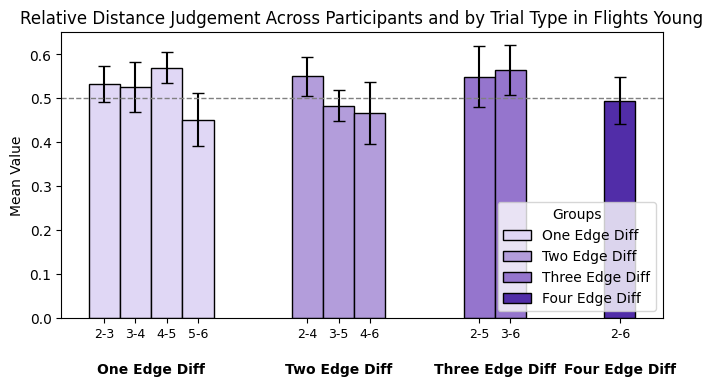

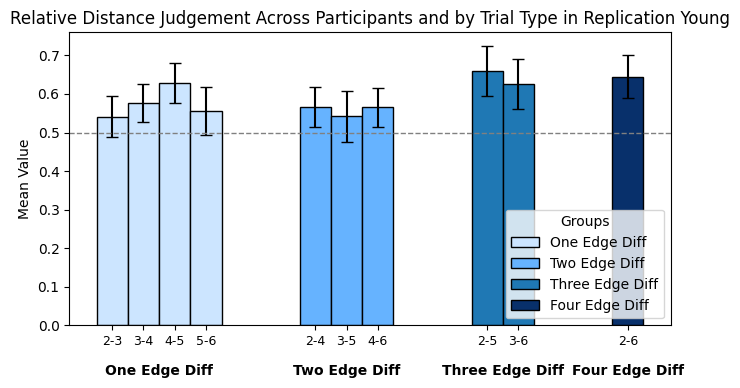

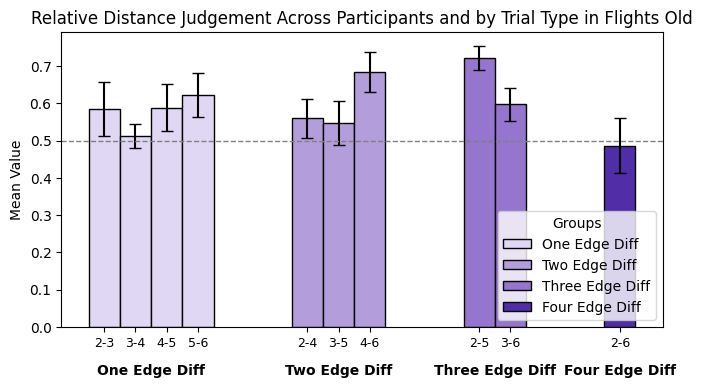

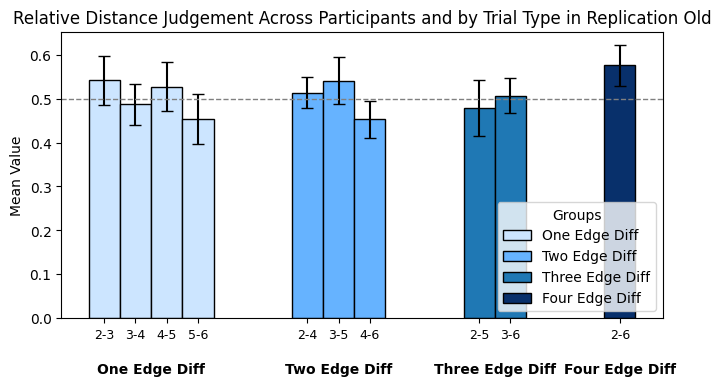

In [18]:
# Relative Distance Judgement Analysis
import matplotlib.pyplot as plt
import numpy as np
def get_relative_distance(df,exp_type):
    shortest_df = df[df['trial_type']=='shortestpath_phase']
    shortest_df = shortest_df.loc[:, ~shortest_df.isna().all()]
    shortest_df = shortest_df.drop(columns=['time_elapsed','cumulative_accuracy']).reset_index(drop='index')
    shortest_df = shortest_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
    shortest_df = shortest_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
    shortest_df = shortest_df.map(lambda x: x.replace('../static/images/GWF/', '') if isinstance(x, str) else x)
    shortest_df = shortest_df[shortest_df['rt']>400]
    shortest_df = shortest_df[shortest_df['rt']<3000]
    shortest_df = shortest_df[~shortest_df['stimulus'].isna()]
    # for id in bad_partid:
    #     shortest_df = shortest_df[shortest_df['partid'] != id]
    grouped_shortest = shortest_df.groupby(['partid','specific_pairs'])['accuracy'].agg(['mean','count']).reset_index()

    twothree = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Three Edge']
    threefour = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Four Edge']
    fourfive = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Five Edge']
    fivesix = grouped_shortest[grouped_shortest['specific_pairs']=='Five Edge Six Edge']

    twofour = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Four Edge']
    threefive = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Five Edge']
    foursix = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Six Edge']

    twofive = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Five Edge']
    threesix = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Six Edge']

    twosix = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Six Edge']

    # --- Sample Data ---
    group_labels = ['One Edge Diff', 'Two Edge Diff', 'Three Edge Diff', 'Four Edge Diff']

    # Generate dummy data
    heights = [
        [twothree['mean'].mean(), threefour['mean'].mean(), fourfive['mean'].mean(), fivesix['mean'].mean()],  # One diff
        [twofour['mean'].mean(), threefive['mean'].mean(), foursix['mean'].mean()],       # Two diff
        [twofive['mean'].mean(), threesix['mean'].mean()],            # Three diff
        [twosix['mean'].mean()]                  # Four diff
    ]

    errors = [
        [twothree['mean'].sem(), threefour['mean'].sem(), fourfive['mean'].sem(), fivesix['mean'].sem()],  # One diff
        [twofour['mean'].sem(), threefive['mean'].sem(), foursix['mean'].sem()],       # Two diff
        [twofive['mean'].sem(), threesix['mean'].sem()],            # Three diff
        [twosix['mean'].sem()]                  # Four diff
    ]

    bar_labels = [
        ['2-3', '3-4', '4-5', '5-6'],     # One diff
        ['2-4', '3-5', '4-6'],          # Two diff
        ['2-5', '3-6'],               # Three diff
        ['2-6']                    # Four diff
    ]

    bar_width = 0.2
    group_gap = 0.5

    fig, ax = plt.subplots(figsize=(7, 4))

    x_offset = 0
    all_positions = []
    all_labels = []
    group_centers = []
    # Optional: participant-level means
    participant_means = shortest_df.groupby(['partid', 'specific_pairs'])['accuracy'].mean().reset_index()

    # Then Tukey test on those
    # tukey = pairwise_tukeyhsd(endog=participant_means['accuracy'],
    #                         groups=participant_means['specific_pairs'],
    #                         alpha=0.05)
    # print(tukey.summary())
    # Define blue color shades (lightest to darkest)
    if exp_type == 'Flights Young':
        group_colors = ['#e0d7f5', '#b39ddb', '#9575cd', '#512da8']
    elif exp_type == 'Replication Young':
        group_colors = ['#cce5ff', '#66b3ff', '#1f78b4', '#08306b']  # Adjust or expand as needed

    if exp_type == 'Flights Old':
        group_colors = ['#e0d7f5', '#b39ddb', '#9575cd', '#512da8']
    elif exp_type == 'Replication Old':
        group_colors = ['#cce5ff', '#66b3ff', '#1f78b4', '#08306b']  # Adjust or expand as needed

    for i, (group, group_err, labels) in enumerate(zip(heights, errors, bar_labels)):
        num_bars = len(group)
        positions = np.arange(num_bars) * bar_width + x_offset
        ax.bar(positions, group, yerr=group_err, capsize=4, width=bar_width,
            edgecolor='black', label=group_labels[i], color=group_colors[i])
        
        # Store positions and labels for x-ticks
        all_positions.extend(positions)
        all_labels.extend(labels)
        
        # Calculate center of group for big group label
        group_centers.append(positions.mean())
        
        # Update x offset for next group
        x_offset = positions[-1] + bar_width + group_gap

    # Set small bar labels as x-tick labels
    ax.set_xticks(all_positions)
    ax.set_xticklabels(all_labels, fontsize=9)

    # Add big group labels below
    for center, label in zip(group_centers, group_labels):
        ax.text(center, -0.1, label, ha='center', va='top', fontsize=10,
                fontweight='bold', transform=ax.transData)
    # --- Formatting ---
    ax.legend(title='Groups')
    ax.set_ylabel('Mean Value')
    ax.set_title(f'Relative Distance Judgement Across Participants and by Trial Type in {exp_type}')
    plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()
    return grouped_shortest
flights_grouped_short = get_relative_distance(df_flights[df_flights['age']=='young'],'Flights Young')
rep_grouped_short = get_relative_distance(df_rep[df_rep['age']=='young'],'Replication Young')
flights_grouped_short = get_relative_distance(df_flights[df_flights['age']=='old'],'Flights Old')
rep_grouped_short = get_relative_distance(df_rep[df_rep['age']=='old'],'Replication Old')

In [19]:
print("Replication OA: ",len(df_rep[df_rep['age']=='old']['partid'].unique()))
print("Replication YA: ",len(df_rep[df_rep['age']=='young']['partid'].unique()))
print("Flights OA: ",len(df_flights[df_flights['age']=='old']['partid'].unique()))
print("Flights YA: ",len(df_flights[df_flights['age']=='young']['partid'].unique()))

Replication OA:  17
Replication YA:  15
Flights OA:  11
Flights YA:  12


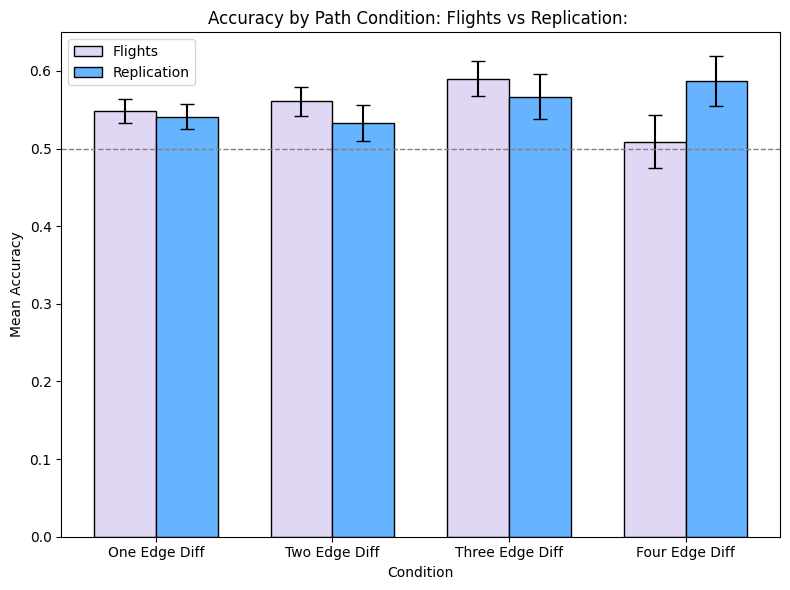


Tukey HSD Results for Flights:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
 Four Edge Diff   One Edge Diff   0.0398 0.6436 -0.0488 0.1285  False
 Four Edge Diff Three Edge Diff   0.0812 0.0849 -0.0075 0.1698  False
 Four Edge Diff   Two Edge Diff    0.052 0.4212 -0.0367 0.1406  False
  One Edge Diff Three Edge Diff   0.0414 0.6144 -0.0473   0.13  False
  One Edge Diff   Two Edge Diff   0.0122  0.984 -0.0765 0.1008  False
Three Edge Diff   Two Edge Diff  -0.0292 0.8237 -0.1179 0.0594  False
---------------------------------------------------------------------


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

def shortest_sum(df1, df2, label1='Exp 1', label2='Exp 2',age=''):
    # Step 1: Group each df by participant and condition
    df1 = df1[df1['trial_type']=='shortestpath_phase']
    df2 = df2[df2['trial_type']=='shortestpath_phase']
    df1 = df1[df1['rt']> 400]
    df1 = df1[df1['rt']< 5000]
    df2 = df2[df2['rt']> 400]
    df2 = df2[df2['rt']< 5000]
    participant_means_1 = df1.groupby(['partid', 'condition'])['accuracy'].mean().reset_index()
    participant_means_2 = df2.groupby(['partid', 'condition'])['accuracy'].mean().reset_index()

    # Step 2: Compute mean and SEM per condition for each dataset
    summary1 = participant_means_1.groupby('condition')['accuracy'].agg(['mean', sem]).reset_index()
    summary2 = participant_means_2.groupby('condition')['accuracy'].agg(['mean', sem]).reset_index()

    # Step 3: Align and sort condition order
    condition_order = ['One Edge Diff', 'Two Edge Diff', 'Three Edge Diff', 'Four Edge Diff']
    summary1['condition'] = pd.Categorical(summary1['condition'], categories=condition_order, ordered=True)
    summary2['condition'] = pd.Categorical(summary2['condition'], categories=condition_order, ordered=True)
    summary1 = summary1.sort_values('condition')
    summary2 = summary2.sort_values('condition')

    # Step 4: Plot side-by-side bars
    x = np.arange(len(condition_order))  # Positions for conditions
    width = 0.35  # Width of each bar

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(x - width/2, summary1['mean'], width, yerr=summary1['sem'], capsize=5, label=label1, color='#e0d7f5', edgecolor='black')
    ax.bar(x + width/2, summary2['mean'], width, yerr=summary2['sem'], capsize=5, label=label2, color='#66b3ff', edgecolor='black')

    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

    ax.set_ylabel('Mean Accuracy')
    ax.set_xlabel('Condition')
    ax.set_title(f'Accuracy by Path Condition: {label1} vs {label2}: {age}')
    ax.set_xticks(x)
    ax.set_xticklabels(condition_order)
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Optional: Tukey HSD test on one of the datasets
    tukey = pairwise_tukeyhsd(endog=participant_means_1['accuracy'],
                              groups=participant_means_1['condition'],
                              alpha=0.05)
    print(f"\nTukey HSD Results for {label1}:")
    print(tukey.summary())

shortest_sum(df_flights, df_rep, label1='Flights', label2='Replication')

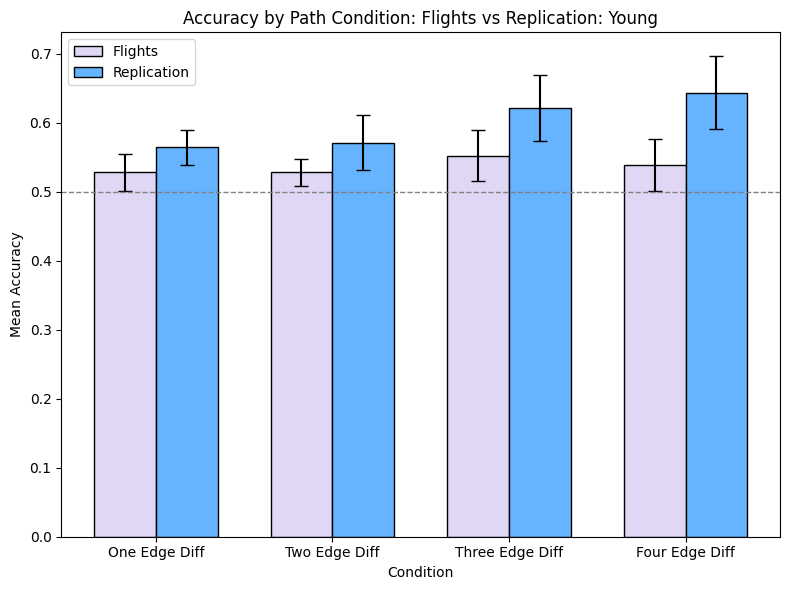


Tukey HSD Results for Flights:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
 Four Edge Diff   One Edge Diff  -0.0108 0.9948 -0.1289 0.1073  False
 Four Edge Diff Three Edge Diff   0.0135 0.9899 -0.1045 0.1316  False
 Four Edge Diff   Two Edge Diff  -0.0106 0.9951 -0.1287 0.1074  False
  One Edge Diff Three Edge Diff   0.0243  0.946 -0.0937 0.1424  False
  One Edge Diff   Two Edge Diff   0.0002    1.0 -0.1179 0.1182  False
Three Edge Diff   Two Edge Diff  -0.0241 0.9471 -0.1422 0.0939  False
---------------------------------------------------------------------


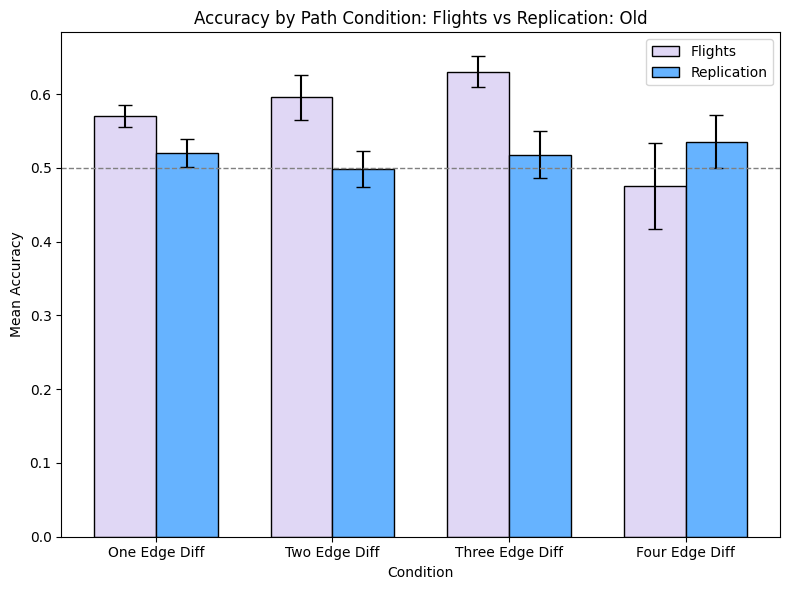


Tukey HSD Results for Flights:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
 Four Edge Diff   One Edge Diff    0.095 0.2437 -0.0389 0.2289  False
 Four Edge Diff Three Edge Diff    0.155 0.0177  0.0211 0.2889   True
 Four Edge Diff   Two Edge Diff   0.1202 0.0922 -0.0137 0.2542  False
  One Edge Diff Three Edge Diff     0.06 0.6301 -0.0739 0.1939  False
  One Edge Diff   Two Edge Diff   0.0252 0.9575 -0.1087 0.1591  False
Three Edge Diff   Two Edge Diff  -0.0348 0.8981 -0.1687 0.0992  False
---------------------------------------------------------------------


In [21]:
flights_grouped_short = shortest_sum(df_flights[df_flights['age']=='young'],df_rep[df_rep['age']=='young'],'Flights','Replication',age="Young")
rep_grouped_short = shortest_sum(df_flights[df_flights['age']=='old'],df_rep[df_rep['age']=='old'],'Flights','Replication',age="Old")

/var/folders/80/x27szhys5v384yshvf0yrws40000gn/T/ipykernel_21576/1160412345.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=grouped, x='trial_num', y='accuracy', ci=95, color='black', linewidth=2)


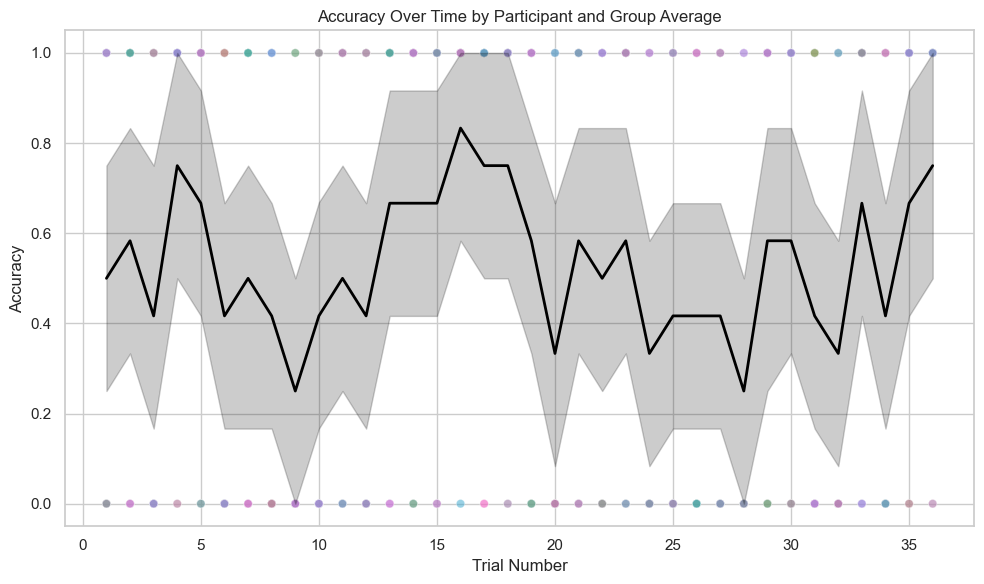

In [22]:
df_flights_sorted = df_flights
df_flights_sorted=df_flights_sorted[(df_flights_sorted['age']=='young')& (df_flights_sorted['condition']=='Two Edge Diff')].sort_values(['partid', 'time_elapsed'])  # Optional: ensure correct order
df_flights_sorted['trial_num'] = df_flights_sorted.groupby('partid').cumcount() + 1  # Starts at 1
# Sort by participant and trial number (or time)
df_flights_sorted = df_flights_sorted.sort_values(['partid', 'trial_num'])

# Compute cumulative accuracy for each participant
df_flights_sorted['cumulative_accuracy'] = df_flights_sorted.groupby('partid')['accuracy'].expanding().mean().reset_index(level=0, drop=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set up seaborn style
sns.set(style="whitegrid")

# Example: Assume df has 'partid', 'trial_num', 'accuracy'
# First, compute accuracy per participant per trial
grouped = df_flights_sorted.groupby(['partid', 'trial_num'])['accuracy'].mean().reset_index()

# Plot individual points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped, x='trial_num', y='accuracy', hue='partid', legend=False, alpha=0.3)

# Add average trend line across all participants
# Option 1: smoothed line
sns.lineplot(data=grouped, x='trial_num', y='accuracy', ci=95, color='black', linewidth=2)

# Optional plot tweaks
plt.xlabel('Trial Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time by Participant and Group Average')
plt.tight_layout()
plt.show()


T-tests vs Chance (0.5):
Old - Flights: t = 5.9476, p = 0.0001, mean = 0.582
Old - Replication: t = 0.6320, p = 0.5363, mean = 0.513
Young - Flights: t = 2.1648, p = 0.0533, mean = 0.531
Young - Replication: t = 2.5464, p = 0.0233, mean = 0.585

2x2 ANOVA Results:
                      sum_sq    df           F        PR(>F)
Intercept           3.725469   1.0  486.172597  9.816771e-28
C(age)              0.014733   1.0    1.922672  1.715940e-01
C(exp_type)         0.032127   1.0    4.192520  4.576979e-02
C(age):C(exp_type)  0.050551   1.0    6.596835  1.318708e-02
Residual            0.390805  51.0         NaN           NaN
     age exp_type      mean       sem
0    old  Flights  0.581961  0.013781
2  young  Flights  0.531294  0.014456

T-test between old Flights and old Replication: t = 2.8612, p = 0.0083


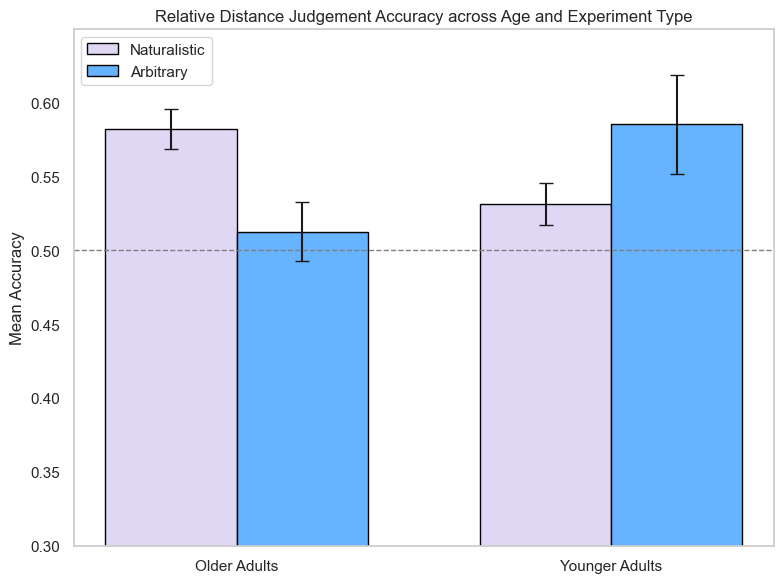

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

def shortest_combined_sum(df1, df2, label1='Flights', label2='Replication'):
    # Filter
    df1 = df1[(df1['trial_type']=='shortestpath_phase') & df1['stimulus'].notna() & (df1['rt'] > 400) & (df1['rt'] < 5000)]
    df2 = df2[(df2['trial_type']=='shortestpath_phase') & df2['stimulus'].notna() & (df2['rt'] > 400) & (df2['rt'] < 5000)]

    # Add experiment type label
    df1 = df1.copy()
    df2 = df2.copy()
    df1['exp_type'] = label1
    df2['exp_type'] = label2

    # Combine both datasets
    combined_df = pd.concat([df1, df2], ignore_index=True)

    # Get participant-level means
    participant_means = combined_df.groupby(['partid', 'age', 'exp_type'])['accuracy'].mean().reset_index()

    from scipy.stats import ttest_1samp

    # Run one-sample t-tests against chance (0.5)
    print("\nT-tests vs Chance (0.5):")
    for age_group in ['old', 'young']:
        for condition in [label1, label2]:
            subset = participant_means[(participant_means['age'] == age_group) & (participant_means['exp_type'] == condition)]['accuracy']
            if len(subset) > 1:  # Check to avoid errors from too-small samples
                t_stat, p_val = ttest_1samp(subset, popmean=0.5)
                print(f"{age_group.capitalize()} - {condition}: t = {t_stat:.4f}, p = {p_val:.4f}, mean = {subset.mean():.3f}")
            else:
                print(f"{age_group.capitalize()} - {condition}: Not enough data for t-test")
    # ---- 2x2 ANOVA ----
    model = ols('accuracy ~ C(age) * C(exp_type)', data=participant_means).fit()
    anova_table = sm.stats.anova_lm(model, typ=3)

    print("\n2x2 ANOVA Results:")
    print(anova_table)

    # ---- Plotting (same as before) ----
    summary = participant_means.groupby(['age', 'exp_type'])['accuracy'].agg(['mean', sem]).reset_index()
    
    condition_order = ['old','young']

    axis_labels = ['Older Adults','Younger Adults']
    summary['age'] = pd.Categorical(summary['age'], categories=condition_order, ordered=True)
    summary = summary.sort_values(['age', 'exp_type'])

    x = np.arange(len(condition_order))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8, 6))
    summary1 = summary[summary['exp_type'] == label1]
    summary2 = summary[summary['exp_type'] == label2]
    grouped_part = participant_means.groupby(['age', 'exp_type']).describe().reset_index()

    print(summary1)
    old_flights = participant_means[(participant_means['age']=='old') & (participant_means['exp_type']=='Flights')]['accuracy']
    old_rep = participant_means[(participant_means['age']=='old') & (participant_means['exp_type']=='Replication')]['accuracy']
  
    t_stat, p_value = ttest_ind(old_flights, old_rep, equal_var=False)
    print(f"\nT-test between old Flights and old Replication: t = {t_stat:.4f}, p = {p_value:.4f}")
    # Bar plots
    ax.bar(x - width/2, summary1['mean'], width, yerr=summary1['sem'], capsize=5, label='Naturalistic', color='#e0d7f5', edgecolor='black')
    ax.bar(x + width/2, summary2['mean'], width, yerr=summary2['sem'], capsize=5, label='Arbitrary', color='#66b3ff', edgecolor='black')

    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
    ax.set_ylabel('Mean Accuracy')
    ax.set_title(f'Relative Distance Judgement Accuracy across Age and Experiment Type')
    ax.set_xticks(x)
    ax.set_xticklabels(axis_labels)
    ax.legend()
    plt.ylim(0.3)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

shortest_combined_sum(df_flights, df_rep, label1='Flights', label2='Replication')


2x2 ANOVA Results:
                      sum_sq    df           F        PR(>F)
Intercept           3.725469   1.0  486.172597  9.816771e-28
C(age)              0.014733   1.0    1.922672  1.715940e-01
C(exp_type)         0.032127   1.0    4.192520  4.576979e-02
C(age):C(exp_type)  0.050551   1.0    6.596835  1.318708e-02
Residual            0.390805  51.0         NaN           NaN
     age exp_type      mean       sem
0    old  Flights  0.581961  0.013781
2  young  Flights  0.531294  0.014456

T-test between old Flights and old Replication: t = 2.8612, p = 0.0083


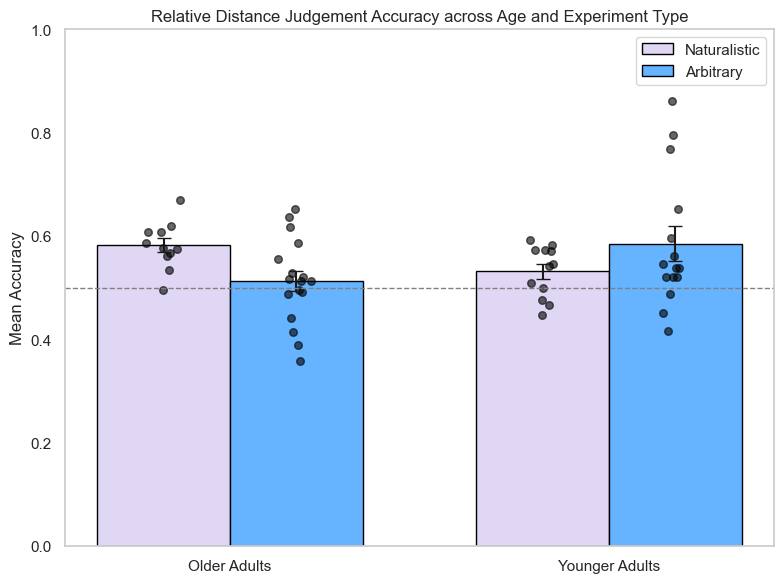

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

def shortest_combined_sum(df1, df2, label1='Flights', label2='Replication'):
    # Filter
    df1 = df1[(df1['trial_type']=='shortestpath_phase') & df1['stimulus'].notna() & (df1['rt'] > 400) & (df1['rt'] < 5000)]
    df2 = df2[(df2['trial_type']=='shortestpath_phase') & df2['stimulus'].notna() & (df2['rt'] > 400) & (df2['rt'] < 5000)]

    # Add experiment type label
    df1 = df1.copy()
    df2 = df2.copy()
    df1['exp_type'] = label1
    df2['exp_type'] = label2

    # Combine both datasets
    combined_df = pd.concat([df1, df2], ignore_index=True)

    # Get participant-level means
    participant_means = combined_df.groupby(['partid', 'age', 'exp_type'])['accuracy'].mean().reset_index()

    # ---- 2x2 ANOVA ----
    model = ols('accuracy ~ C(age) * C(exp_type)', data=participant_means).fit()
    anova_table = sm.stats.anova_lm(model, typ=3)

    print("\n2x2 ANOVA Results:")
    print(anova_table)

    # ---- Plotting (same as before) ----
    summary = participant_means.groupby(['age', 'exp_type'])['accuracy'].agg(['mean', sem]).reset_index()
    
    condition_order = ['old','young']

    axis_labels = ['Older Adults','Younger Adults']
    summary['age'] = pd.Categorical(summary['age'], categories=condition_order, ordered=True)
    summary = summary.sort_values(['age', 'exp_type'])

    x = np.arange(len(condition_order))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8, 6))
    summary1 = summary[summary['exp_type'] == label1]
    summary2 = summary[summary['exp_type'] == label2]
    grouped_part = participant_means.groupby(['age', 'exp_type']).describe().reset_index()

    print(summary1)
    old_flights = participant_means[(participant_means['age']=='old') & (participant_means['exp_type']=='Flights')]['accuracy']
    old_rep = participant_means[(participant_means['age']=='old') & (participant_means['exp_type']=='Replication')]['accuracy']
  
    t_stat, p_value = ttest_ind(old_flights, old_rep, equal_var=False)
    print(f"\nT-test between old Flights and old Replication: t = {t_stat:.4f}, p = {p_value:.4f}")
    # Bar plots
        # Bar plots
    ax.bar(x - width/2, summary1['mean'], width, yerr=summary1['sem'], capsize=5, label='Naturalistic', color='#e0d7f5', edgecolor='black')
    ax.bar(x + width/2, summary2['mean'], width, yerr=summary2['sem'], capsize=5, label='Arbitrary', color='#66b3ff', edgecolor='black')

    # Add individual data points with jitter
    for i, age_group in enumerate(condition_order):
        # Naturalistic condition
        nat_data = participant_means[(participant_means['age'] == age_group) & (participant_means['exp_type'] == label1)]['accuracy']
        nat_jitter = np.random.normal(loc=x[i] - width/2, scale=0.02, size=len(nat_data))
        ax.scatter(nat_jitter, nat_data, color='black', alpha=0.6, s=30)

        # Arbitrary condition
        arb_data = participant_means[(participant_means['age'] == age_group) & (participant_means['exp_type'] == label2)]['accuracy']
        arb_jitter = np.random.normal(loc=x[i] + width/2, scale=0.02, size=len(arb_data))
        ax.scatter(arb_jitter, arb_data, color='black', alpha=0.6, s=30)

    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
    ax.set_ylabel('Mean Accuracy')
    ax.set_title(f'Relative Distance Judgement Accuracy across Age and Experiment Type')
    ax.set_xticks(x)
    ax.set_xticklabels(axis_labels)
    ax.legend()
    plt.ylim(0,1)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
shortest_combined_sum(df_flights, df_rep, label1='Flights', label2='Replication')

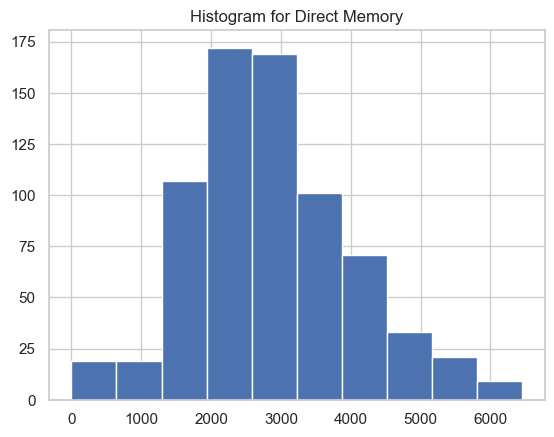

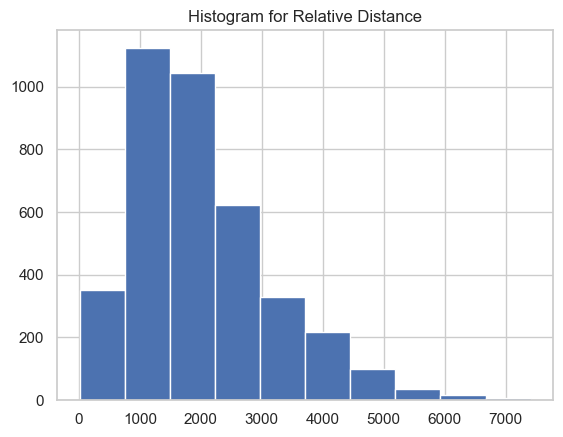

In [24]:
Q1 = direct_df['rt'].quantile(0.25)
Q3 = direct_df['rt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

plt.hist(direct_df['rt'])
plt.title("Histogram for Direct Memory")
plt.show()

plt.hist(shortest_df['rt'])
plt.title("Histogram for Relative Distance")
plt.show()

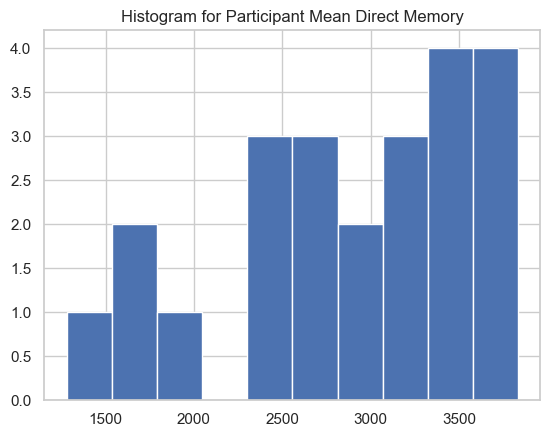

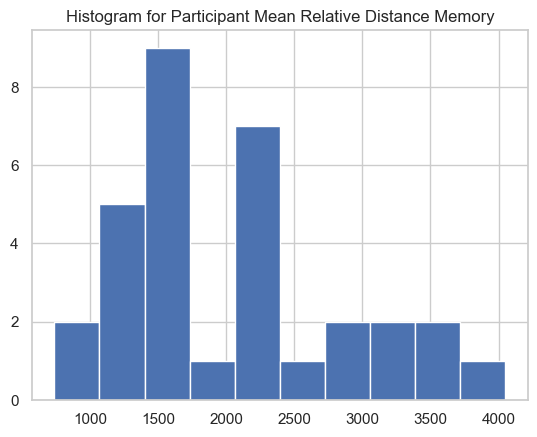

In [25]:
plt.hist(direct_df.groupby('partid')['rt'].mean())
plt.title("Histogram for Participant Mean Direct Memory")
plt.show()

plt.hist(shortest_df.groupby('partid')['rt'].mean())
plt.title("Histogram for Participant Mean Relative Distance Memory")
plt.show()